# Title: Heart Disease Prediction
Author: [Muhammad Wajahat](https://github.com/Wajahat114)\
Date: 24-Jan-2025\
Dataset: [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

## About Dataset
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

### Importing Libraries
let's start the project by importing the necessary libraries.

In [1]:
# import libraries

# To handle data
import numpy as np
import pandas as pd

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# for classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# import pipeline
from sklearn.pipeline import Pipeline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [3]:
# load data
df = pd.read_csv('Datasets/heart_disease_uci.csv')

# display the first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Exploratory Data Analysis (EDA)

#### Exploring each column of the dataset

In [207]:
# exploring each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [208]:
df.shape

(920, 16)

In [209]:
# print range of values for each column
for col in df.select_dtypes(exclude='object').columns:
    print(f'"{col}" has range of values from {df[col].min()} to {df[col].max()}')

"id" has range of values from 1 to 920
"age" has range of values from 28 to 77
"trestbps" has range of values from 0.0 to 200.0
"chol" has range of values from 0.0 to 603.0
"thalch" has range of values from 60.0 to 202.0
"oldpeak" has range of values from -2.6 to 6.2
"ca" has range of values from 0.0 to 3.0
"num" has range of values from 0 to 4


<Axes: xlabel='age', ylabel='Count'>

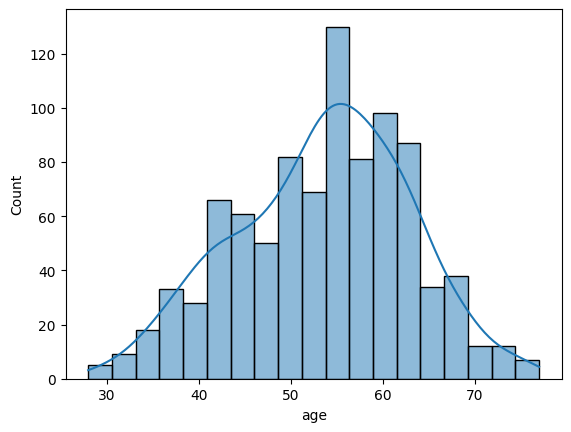

In [210]:
# draw histogram for age column to see the distribution
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Mode: 54
Median: 54.0


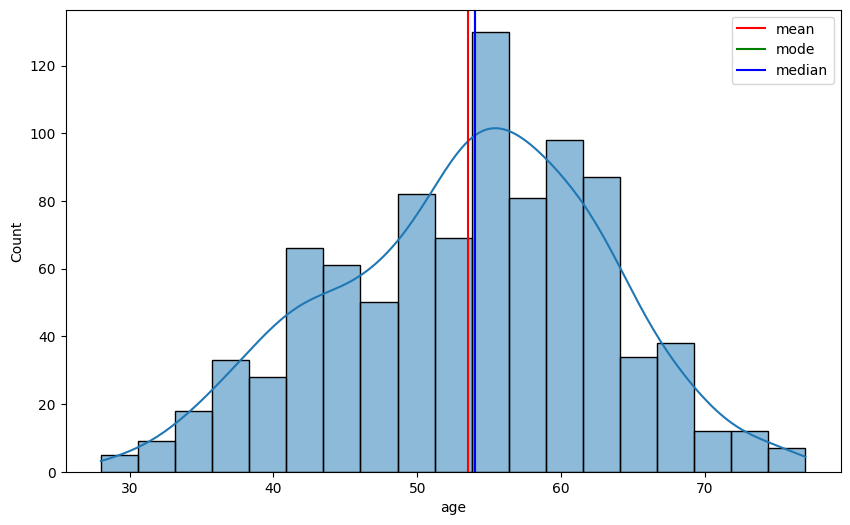

In [211]:
# plot the same histogram with mean, mode and median
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].mode()[0], color='green', label='mode')
plt.axvline(df['age'].median(), color='blue', label='median')
plt.legend()

# print the mean, mode and median
print(f'Mean: {df["age"].mean()}')
print(f'Mode: {df["age"].mode()[0]}')
print(f'Median: {df["age"].median()}')

In [212]:

# plot this using plotly with ploting female first then male
fig = px.histogram(df, x='age', color='sex', nbins=30,category_orders={'sex':['Female','Male']})
fig.update_layout(width=800, height=500)
fig.show()

In [213]:
# percentage of female and male in data
m_per = (df['sex'] == 'Male').sum() / df['sex'].value_counts().sum() * 100
f_per = 100 - m_per
print(f'Percentage of Male with heart disease in given dataset: {m_per:.2f}%')
print(f'Percentage of Female with heart disease in given dataset: {f_per:.2f}%')
print(f'Males are {(m_per/f_per):.2f} times more likely to have heart disease.') 

Percentage of Male with heart disease in given dataset: 78.91%
Percentage of Female with heart disease in given dataset: 21.09%
Males are 3.74 times more likely to have heart disease.


In [214]:
df1=df['dataset'].value_counts().reset_index()
#index where count is minimum
min_index = df1['count'].idxmin()
max_index = df1['count'].idxmax()
print(f"Minimum amount of patients are from {df1['dataset'][min_index]} with total patients of {df1['count'][min_index]} persons")
print(f"Maximum amount of patients are from {df1['dataset'][max_index]} with total patients of {df1['count'][max_index]} persons")

Minimum amount of patients are from Switzerland with total patients of 123 persons
Maximum amount of patients are from Cleveland with total patients of 304 persons


In [215]:
print(f"Mean of Patient's age correspond to the place: {df.groupby('dataset')['age'].mean()}")
print('---------------------------------------------')
print(f'Median of Patient\'s age correspond to the place: {df.groupby("dataset")["age"].median()}')
print('---------------------------------------------')
print(f'Mode of Patient\'s age correspond to the place: {df.groupby("dataset")["age"].apply(lambda x: x.mode().values[0])}')

Mean of Patient's age correspond to the place: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
---------------------------------------------
Median of Patient's age correspond to the place: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
---------------------------------------------
Mode of Patient's age correspond to the place: dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


In [216]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

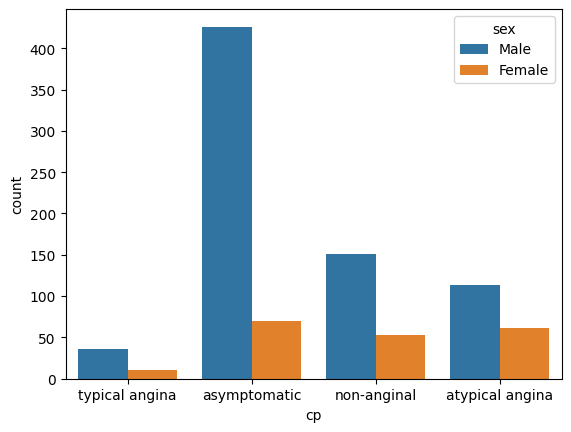

In [217]:
# count plot for chest pain type for male and female
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

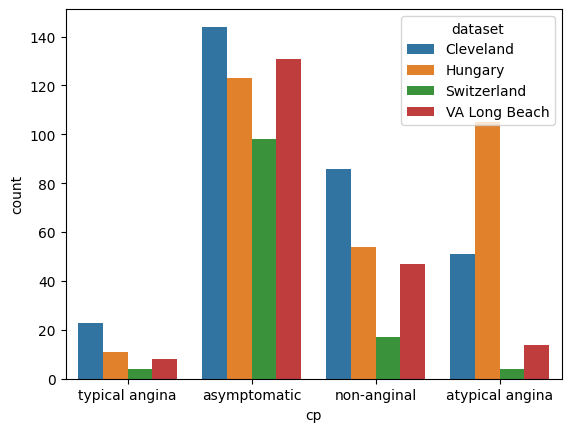

In [218]:
# count plot for chest pain correspond to the place
sns.countplot(data=df, x='cp', hue='dataset')

#### Outputs:
1. The minimum age to have a heart disease starts from 28 years.
2. Most of the patients get heart disease at the age of 53-54 year.
3. Percentage of Male with heart disease in given dataset: 78.91%
4. Percentage of Female with heart disease in given dataset: 21.09%
5. Males are 3.74 times more likely to have heart disease.
6. Minimum amount of patients are from Switzerland with total patients of 123 persons
7. Maximum amount of patients are from Cleveland with total patients of 304 persons

 ### <span style="color:lightblue"><b>Imputing Missing Values</b></span>


In [219]:
# checking missing values
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [221]:
cat_cols=df.columns[(df.isnull().sum()>0) & (df.dtypes=='object')]
num_cols=df.columns[(df.isnull().sum()>0) & (df.dtypes!='object')]
print(f'Categorical Columns with missing values: {cat_cols}')
print(f'Numerical Columns with missing values: {num_cols}')

Categorical Columns with missing values: Index(['fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
Numerical Columns with missing values: Index(['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')


In [222]:
def impute_missing_values(df, num_cols, cat_cols):
    imputer_1= IterativeImputer(max_iter=10, random_state=42)
    imputer_2=KNNImputer(n_neighbors=3)
    le=LabelEncoder()
    for col in num_cols:
        df[col]=imputer_2.fit_transform(df[[col]])
    for col in cat_cols:
        df[col]=le.fit_transform(df[col])
        df[col]=imputer_1.fit_transform(df[[col]])
    return df

In [223]:
impute_missing_values(df, num_cols, cat_cols)
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### <span style="color:lightblue"><b>Dealing with outliers</b></span>

In [224]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


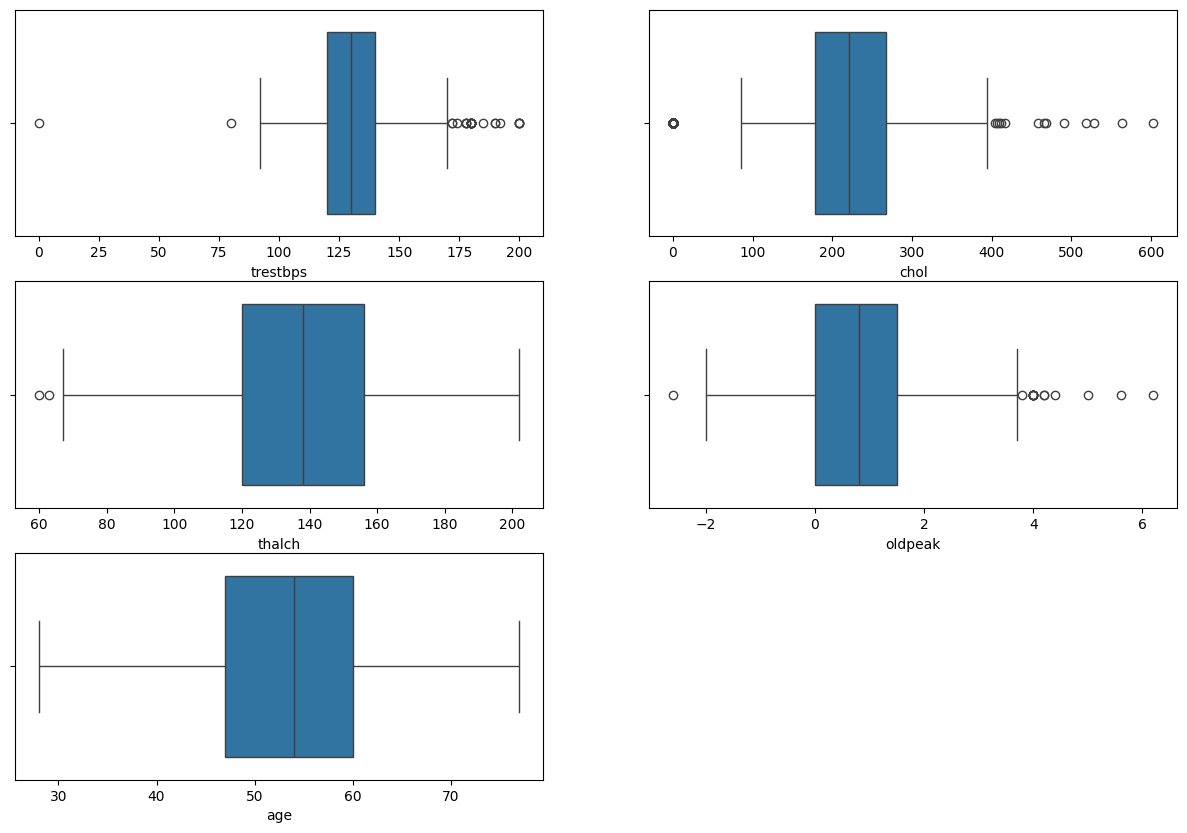

In [225]:
# remove ca and add age column from numerical columns
num_cols = num_cols.drop('ca').append(pd.Index(['age']))
num_cols
# ploting boxplot for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[col], orient='h')

we can see unusual values for `trestbps` (resting blood pressure)

In [226]:
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,0.0,1.0,155.0,0.0,1.5,1.0,0.676375,3.0,3


In [227]:
# remove rows with trestbps=0
df = df[df['trestbps']!=0]

rest of the data seems fine so we will only deal with `trestbps` column ub this section.

### <span style="color:lightyellow"><b>Machine learning</b></span>

In [228]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target column is `num` which is the predicted attribute. We will use this column to predict whether a person has heart disease or not.
The unique value in this column are:
* `0`: Absence of heart disease
* `1`: mild heart disease
* `2`: moderate heart disease
* `3`: severe heart disease
* `4`: presence of heart disease

In [229]:
# split data into features and target
X = df.drop('num', axis=1)
y = df['num']

# encode X
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = LabelEncoder().fit_transform(X[col])
    else:
        pass

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

These models are used to predict the presence of heart disease in a patient. We will use the following models:
1. Logistic Regression
2. K-Nearest Neighbors
3. Naive Bayes
4. Support Vector Machine
5. Decision Tree
6. Random Forest
7. XGBoost
8. AdaBoost
9. LightGBM 

In [230]:
# create a list of models
models = [('LogisticRegression', LogisticRegression(random_state=42)),
          ('KNeighborsClassifier', KNeighborsClassifier()),
          ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
          ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
          ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
          ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
          ('XGBClassifier', XGBClassifier(random_state=42)),
          ('LGBMClassifier', LGBMClassifier(random_state=42)),
          ('SVC', SVC(random_state=42)),
          ('GaussianNB', GaussianNB())]
best_model = None
best_accuracy = 0

for name, model in models:
    pipeline=Pipeline(steps=[ ('model', model)])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    # calculate mean accuracy
    mean_accuracy = scores.mean()
    # fit the model
    pipeline.fit(X_train, y_train)
    # predict the target
    y_pred = pipeline.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    #print performance metrics
    print(f'{name} Model')
    print("Cross Validation Accuracy: {:.2f}%".format(mean_accuracy*100))
    print("Accuracy: {:.2f}%".format(accuracy*100))
    print('-----------------')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f'Best Model: {best_model}')

LogisticRegression Model
Cross Validation Accuracy: 53.20%
Accuracy: 48.91%
-----------------
KNeighborsClassifier Model
Cross Validation Accuracy: 58.10%
Accuracy: 59.24%
-----------------
DecisionTreeClassifier Model
Cross Validation Accuracy: 58.37%
Accuracy: 59.78%
-----------------
RandomForestClassifier Model
Cross Validation Accuracy: 63.67%
Accuracy: 61.96%
-----------------
GradientBoostingClassifier Model
Cross Validation Accuracy: 63.40%
Accuracy: 64.13%
-----------------
AdaBoostClassifier Model
Cross Validation Accuracy: 58.37%
Accuracy: 55.98%
-----------------
XGBClassifier Model
Cross Validation Accuracy: 61.63%
Accuracy: 63.04%
-----------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 588, number 

So LightGBM is the best model for this dataset with an accuracy of 65.22%